We encode the predator–prey equations via a function. 

In [1]:
function predprey(u,p,t)
    alpha,beta = p;  y,z = u;  # rename for convenience
    s = (y*z) / (1+beta*y)     # appears in both equations
    return [ y*(1-alpha*y) - s,  -z + s ]
end

predprey (generic function with 1 method)

Note that the function accepts three inputs, `u`, `p`, and `t`, even though there is no explicit dependence on `t`. The second input is used to pass parameters that don't change throughout a single instance of the problem. 

To solve the IVP we must also provide the initial condition, which is a 2-vector here, and the interval for the independent variable.

In [2]:
u0 = [1,0.01]
tspan = (0.,80.)
alpha = 0.1;  beta = 0.25;

using DifferentialEquations
sol = solve( ODEProblem(predprey,u0,tspan,[alpha,beta]) );

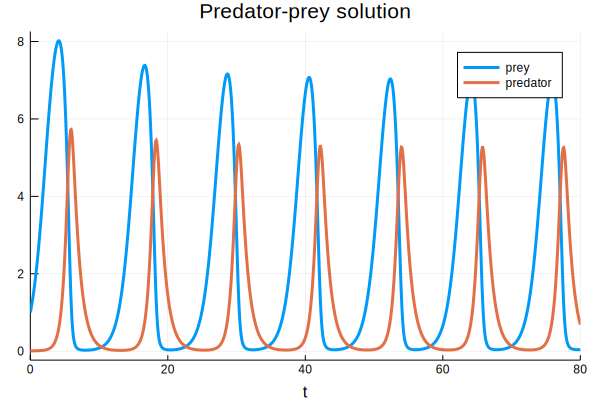

In [3]:
using Plots
plot(sol,label=["prey" "predator"],title="Predator-prey solution")

We can find the discrete values used to compute the interpolated solution. The `sol.u` value is a vector of vectors, which can make manipulating the values a bit tricky. Here we convert the solution values to a matrix with two columns (one for each component).

size(sol.u) = (132,)
(sol.t[20], sol.u[20]) = (8.386622144978078, [0.0277385, 0.69947])


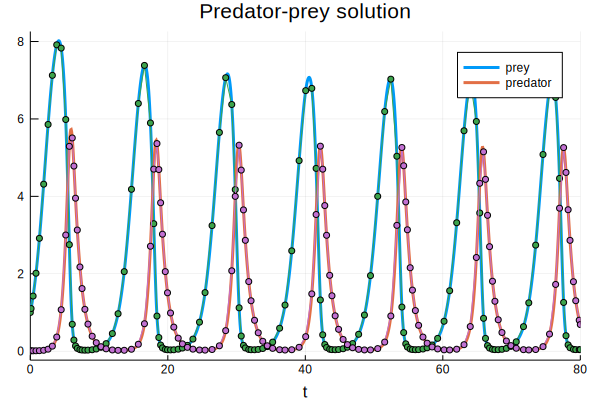

In [4]:
@show size(sol.u);
@show (sol.t[20],sol.u[20]);

u = [ sol.u[i][j] for i=1:length(sol.t), j=1:2 ]
plot!(sol.t,u,m=(:0,3),label="")

When there are just two components, it's common to plot the solution in the _phase plane_, i.e., with $u_1$ and $u_2$ along the axes and time as a parameterization of the curve.

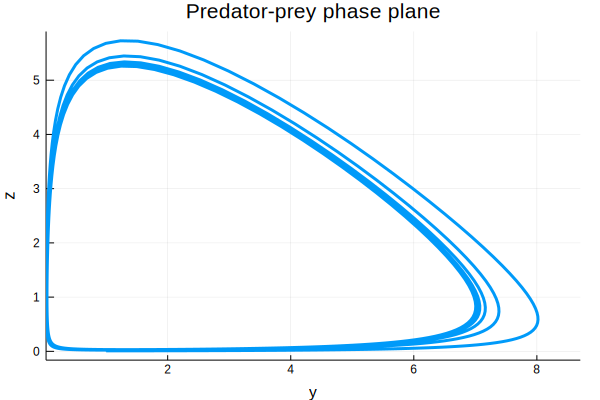

In [5]:
plot(sol,vars=(1,2),label="",
    xlabel="y",ylabel="z",title="Predator-prey phase plane")

From this plot we can deduce that the solution approaches a periodic one, which in the phase plane is reprepresented by a closed loop. 